<a href="https://colab.research.google.com/github/asadbek08/DataScienceMohirdev/blob/main/Aviacompany_Satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn


from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn import metrics
from xgboost import XGBClassifier
import lightgbm as lgb

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv('./train_dataset.csv')
df_train.sample(5)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
1907,1908,Male,Loyal Customer,58,Business travel,Business,1773,1,1,1,...,4,4,4,4,3,4,5,0,0.0,1
4739,4740,Male,Loyal Customer,59,Business travel,Eco,174,1,4,4,...,2,3,3,3,1,4,1,139,135.0,0
7435,7436,Female,Loyal Customer,62,Personal Travel,Eco,1576,0,4,0,...,3,3,0,2,1,3,4,0,0.0,1
6097,6098,Female,Loyal Customer,32,Business travel,Business,1859,3,3,3,...,4,2,4,5,5,4,4,5,11.0,1
5893,5894,Male,Loyal Customer,44,Business travel,Business,1609,3,2,2,...,3,3,2,3,1,3,4,22,19.0,0


In [3]:
df_train['satisfaction'].value_counts()

satisfaction
0    5000
1    5000
Name: count, dtype: int64

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 10000 non-null  int64  
 1   Gender                             10000 non-null  object 
 2   Customer Type                      10000 non-null  object 
 3   Age                                10000 non-null  int64  
 4   Type of Travel                     10000 non-null  object 
 5   Class                              10000 non-null  object 
 6   Flight Distance                    10000 non-null  int64  
 7   Inflight wifi service              10000 non-null  int64  
 8   Departure/Arrival time convenient  10000 non-null  int64  
 9   Ease of Online booking             10000 non-null  int64  
 10  Gate location                      10000 non-null  int64  
 11  Food and drink                     10000 non-null  int6

In [5]:
df_train['Arrival Delay in Minutes'].isna().value_counts()

Arrival Delay in Minutes
False    9972
True       28
Name: count, dtype: int64

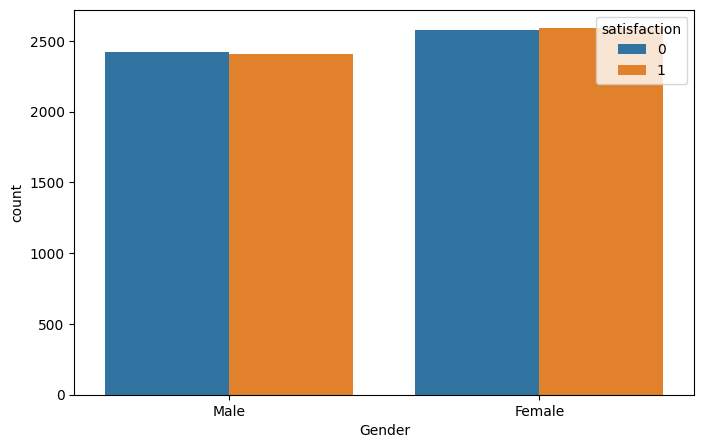

In [6]:
# We will see the correlation between gender and satisfaction by plotting bar chart
custom_palette = ['#DB4437', '#0F9D58']
plt.figure(figsize=(8,5))
sns.countplot(x='Gender', hue='satisfaction', data=df_train)
plt.show()

In [7]:
# we can say there is no any correlation between gender and satisfaction, so we can drop it at the end

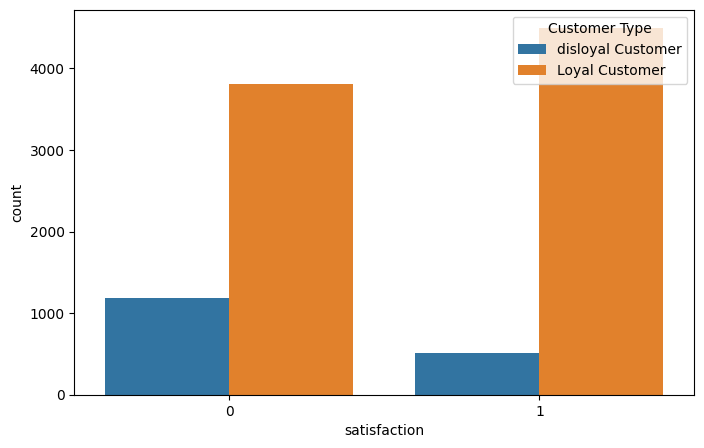

In [8]:
# Lets for Customer Type
plt.figure(figsize=(8,5))
sns.countplot(x='satisfaction', hue='Customer Type', data=df_train)
plt.show()

In [9]:
# We can there is a small correlation between Customer Type and Satisfaction, while more loyals satisfied a bit better than disloyals

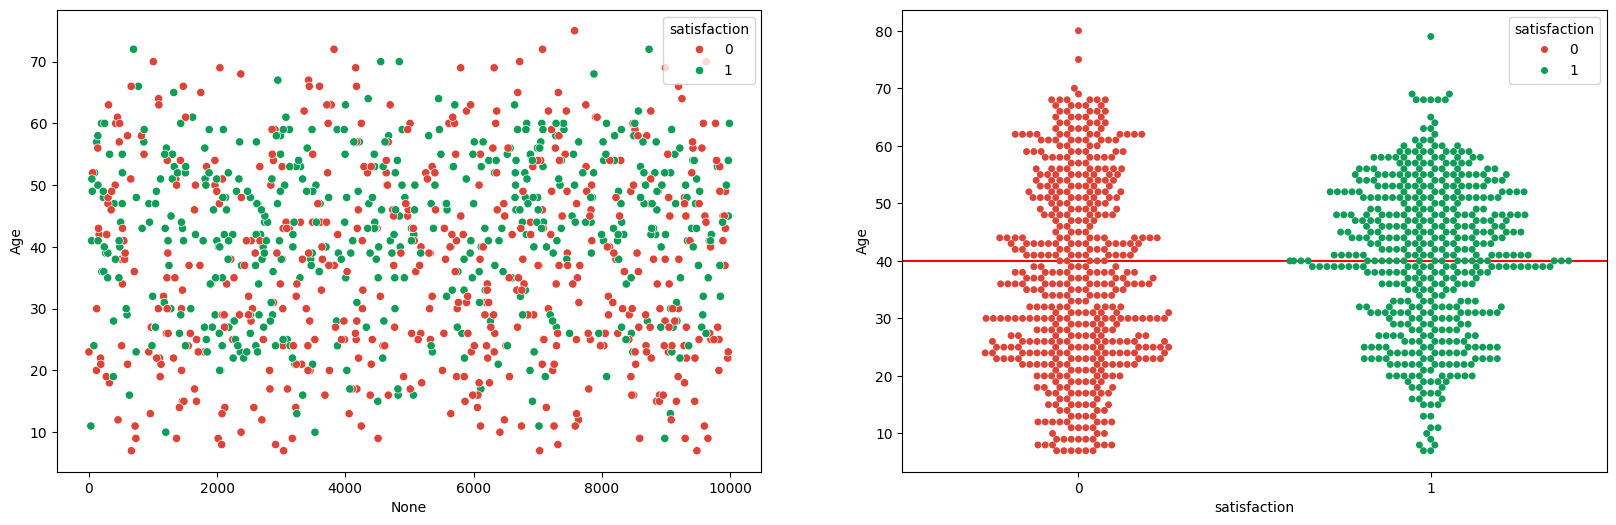

In [10]:
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.scatterplot( ax=ax[0], data=df_train.sample(1000), x=df_train.sample(1000).index, y='Age', hue="satisfaction", palette=custom_palette)
sns.swarmplot(ax=ax[1],  data=df_train.sample(1000), x='satisfaction', y='Age', hue="satisfaction", palette=custom_palette)
ax[1].axhline(y = 40, color = 'r', linestyle = 'solid')
plt.show()

In [11]:
# we can see more older people tend to be satisfied than younger ones

In [12]:
# Lets see if Type of Travel and Class mean the same thing
df_train[['Type of Travel', 'Class']].value_counts()

Type of Travel   Class   
Business travel  Business    4850
Personal Travel  Eco         2403
Business travel  Eco         1848
                 Eco Plus     381
Personal Travel  Eco Plus     320
                 Business     198
Name: count, dtype: int64

In [13]:
#there is little bit relationship but we cant get rid of any of the column

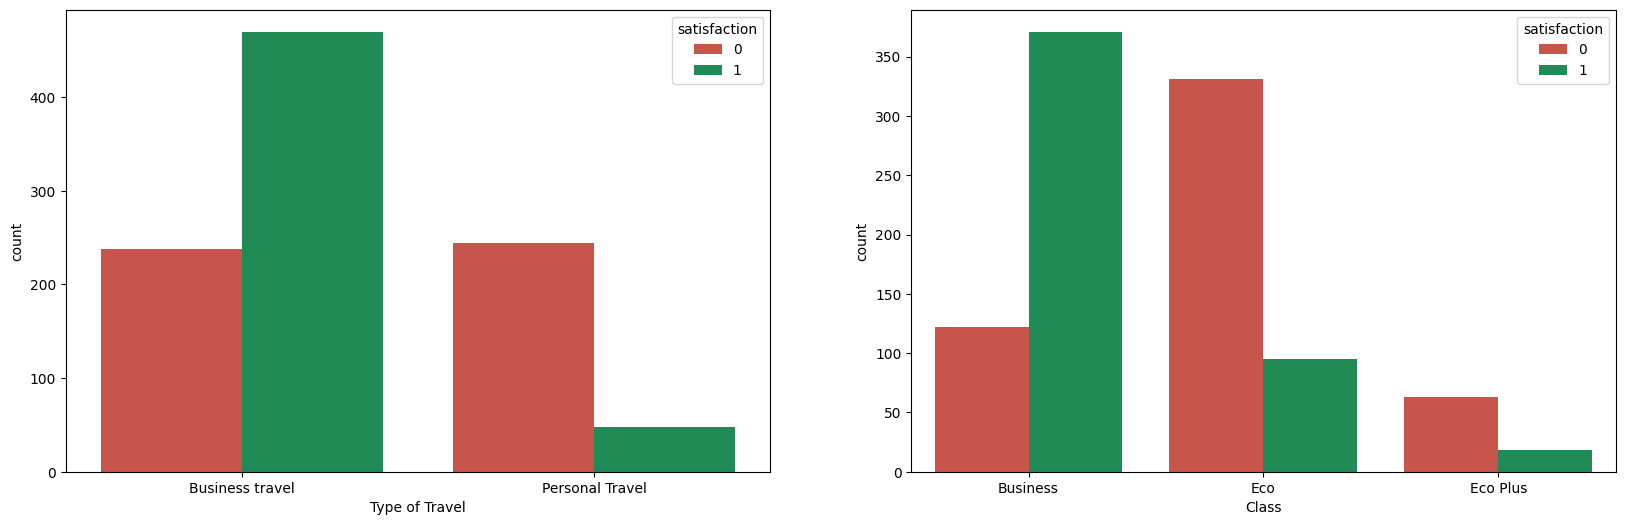

In [14]:
# Lets see by using bar chart
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.countplot( ax=ax[0], data=df_train.sample(1000), x="Type of Travel" , hue="satisfaction", palette=custom_palette)
sns.countplot(ax=ax[1],  data=df_train.sample(1000), x='Class', hue="satisfaction",palette=custom_palette)
plt.show()

In [15]:
# As we said Business travel customers are more satisfied than Personal Travel ones, while on Business class people more liked the service than others

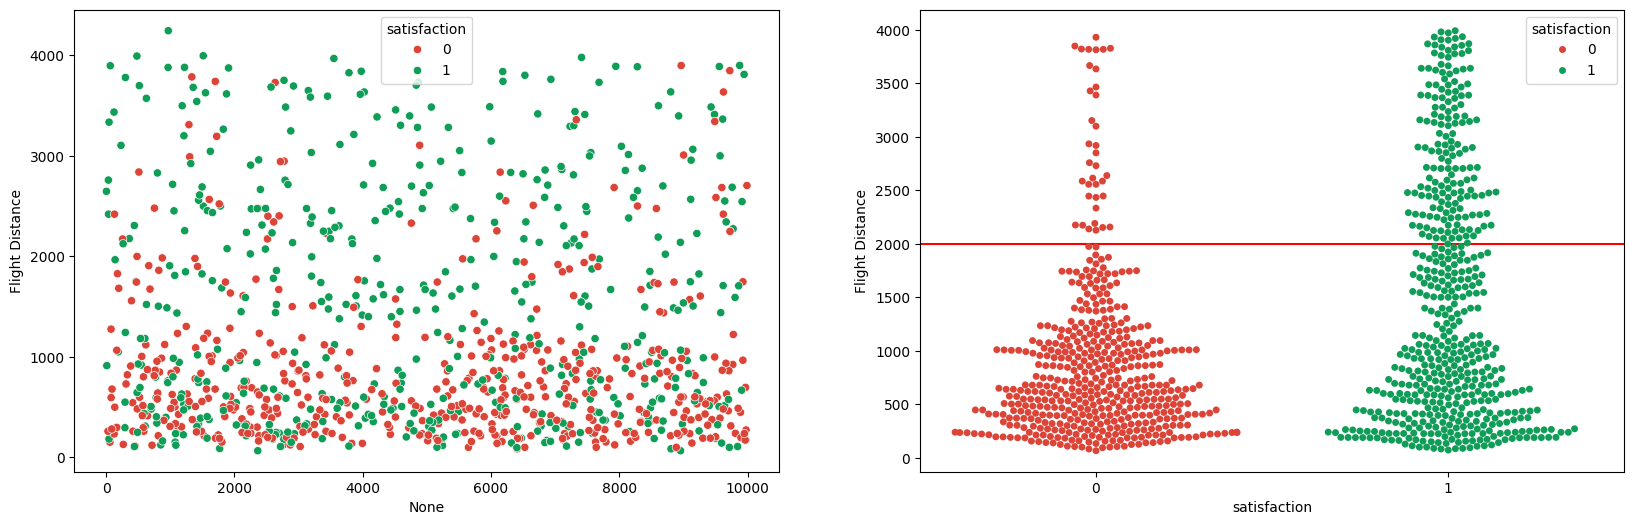

In [16]:
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.scatterplot( ax=ax[0], data=df_train.sample(1000), x=df_train.sample(1000).index, y='Flight Distance', hue="satisfaction", palette=custom_palette)
sns.swarmplot(ax=ax[1],  data=df_train.sample(1000), x='satisfaction', y='Flight Distance', hue="satisfaction", palette=custom_palette)
ax[1].axhline(y = 2000, color = 'r', linestyle = 'solid')
plt.show()

In [17]:
# we can say more people who traveled less distance has litte worse satisfaction rate than long distance travelers

In [18]:
# Lets see the correlation between other numerical values
df_num_cat = df_train.select_dtypes(include=['number'])
correlate_df = df_num_cat.corr().abs()
correlate_df.style.background_gradient(cmap='coolwarm')

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,1.000000,0.002746,0.008459,0.025754,0.015115,0.021299,0.025732,0.006469,0.008159,0.002606,0.003550,0.004153,0.012312,0.001224,0.004622,0.013093,0.004791,0.002204,0.002255,0.002931
Age,0.002746,1.000000,0.110823,0.020904,0.036071,0.026964,0.012077,0.021971,0.215613,0.169291,0.097421,0.073412,0.060124,0.040368,0.038761,0.036921,0.062409,0.015618,0.019086,0.144302
Flight Distance,0.008459,0.110823,1.000000,0.002341,0.021320,0.052807,0.017513,0.065939,0.213859,0.170203,0.150573,0.115167,0.140509,0.073161,0.066881,0.058939,0.100705,0.011425,0.002901,0.298703
Inflight wifi service,0.025754,0.020904,0.002341,1.000000,0.362355,0.730731,0.362702,0.119807,0.438034,0.107020,0.198351,0.133511,0.172526,0.123695,0.039923,0.113467,0.119484,0.019843,0.023086,0.277395
Departure/Arrival time convenient,0.015115,0.036071,0.021320,0.362355,1.000000,0.456498,0.479002,0.001982,0.046456,0.002102,0.007094,0.071368,0.027487,0.072969,0.078166,0.062814,0.001172,0.010846,0.008985,0.067638
Ease of Online booking,0.021299,0.026964,0.052807,0.730731,0.456498,1.000000,0.476405,0.017193,0.388220,0.016831,0.043574,0.053613,0.116333,0.044259,0.013875,0.032168,0.007301,0.001474,0.003715,0.164662
Gate location,0.025732,0.012077,0.017513,0.362702,0.479002,0.476405,1.000000,0.002645,0.003610,0.008359,0.001144,0.015083,0.008752,0.000493,0.037372,0.003065,0.015090,0.001907,0.000684,0.007169
Food and drink,0.006469,0.021971,0.065939,0.119807,0.001982,0.017193,0.002645,1.000000,0.239007,0.573063,0.598209,0.062373,0.045929,0.030299,0.087117,0.035568,0.641701,0.011761,0.011379,0.207854
Online boarding,0.008159,0.215613,0.213859,0.438034,0.046456,0.388220,0.003610,0.239007,1.000000,0.414889,0.292397,0.165847,0.133977,0.080804,0.207733,0.077808,0.341899,0.001727,0.003684,0.504986
Seat comfort,0.002606,0.169291,0.170203,0.107020,0.002102,0.016831,0.008359,0.573063,0.414889,1.000000,0.615310,0.136570,0.121991,0.081107,0.192491,0.074447,0.677454,0.014833,0.013988,0.342294


In [19]:
# Arrival Delay and Departure delay correlation is almost one and Arrival Delay has non values, so we can just drop Arrival Delay column

In [20]:
correlate_df['satisfaction'].sort_values(ascending=False)

satisfaction                         1.000000
Online boarding                      0.504986
Inflight entertainment               0.400900
Seat comfort                         0.342294
On-board service                     0.326426
Leg room service                     0.324368
Cleanliness                          0.310338
Flight Distance                      0.298703
Inflight wifi service                0.277395
Baggage handling                     0.247965
Inflight service                     0.240584
Checkin service                      0.232359
Food and drink                       0.207854
Ease of Online booking               0.164662
Age                                  0.144302
Departure/Arrival time convenient    0.067638
Arrival Delay in Minutes             0.048650
Departure Delay in Minutes           0.042960
Gate location                        0.007169
id                                   0.002931
Name: satisfaction, dtype: float64

In [21]:
# We see Gate Location has not affective correlation with satisfaction, we can drop it while modelling

# ***Data Preparation***

In [22]:
X = df_train.drop(['satisfaction', 'id'], axis=1)
y = df_train['satisfaction']

X_num = X.select_dtypes(include=['number'])
X_cat = X.select_dtypes(include=['object'])

In [23]:
class ColumnDropper(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop):
        self.columns_to_drop = columns_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(self.columns_to_drop, axis=1)

In [24]:
num_pipeline = Pipeline([
    ('drop_columns', ColumnDropper(['Arrival Delay in Minutes', 'Gate location'])),
    ('scaler', StandardScaler())
])
cat_pipeline = Pipeline([
    ('drop_columns', ColumnDropper('Gender')),
    ('encoder', OneHotEncoder())
])
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, X_num.columns),
    ('cat', cat_pipeline, X_cat.columns)
])

In [25]:
X_transformed = full_pipeline.fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# ***Modelling***

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1002
           1       0.90      0.85      0.88       998

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000



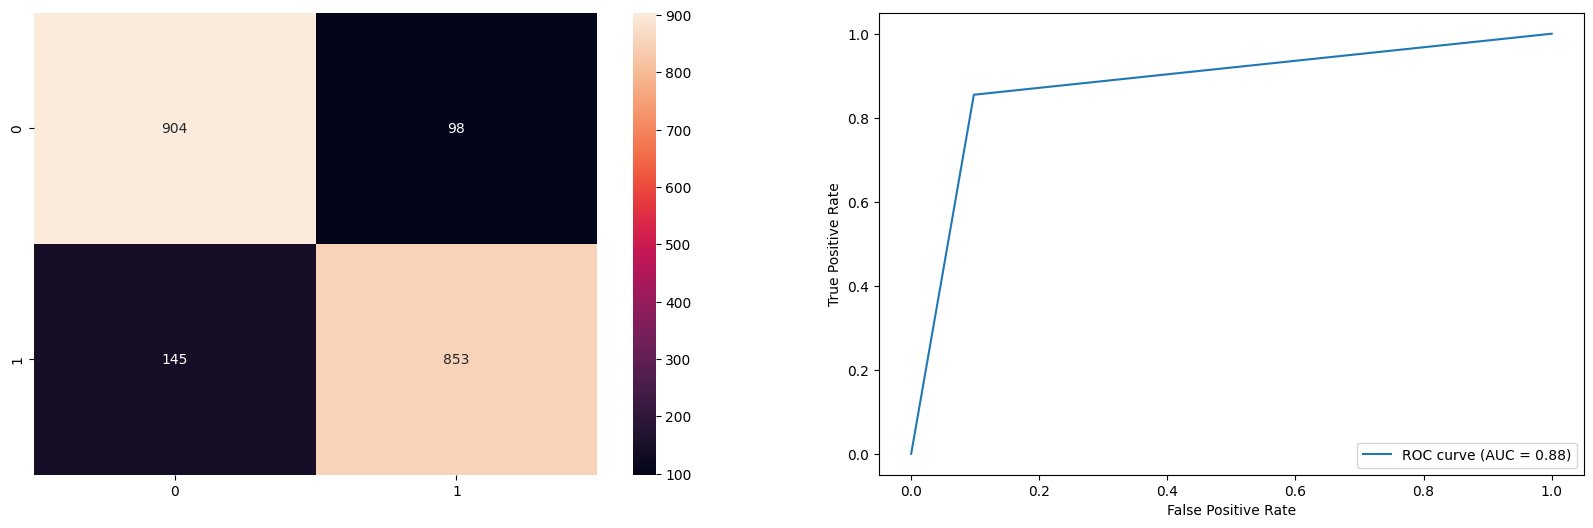

In [63]:
# Logistic Regression Classifier
# Since our dataset can be considered as small, we can use Grid Search paramaters which are suitable for small datasets
LR_model = LogisticRegression()
grid_params = {
    'solver':['liblinear'],
    'penalty':['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

grid_LR_search = GridSearchCV(estimator=LR_model, param_grid=grid_params, cv=5, n_jobs=-1,scoring='accuracy')
grid_LR_search.fit(X_train, y_train)

# Prediction and Evaluation
y_test_predicted = grid_LR_search.predict(X_test)
print(metrics.classification_report(y_test, y_test_predicted))

# Confusion matrix
fig, ax = plt.subplots(1,2,figsize=(20,6))

cm = metrics.confusion_matrix(y_test, y_test_predicted)
sns.heatmap(cm, annot=True, fmt='d', ax=ax[0])


# ROC curve to the right
fpr, tpr, _ = metrics.roc_curve(y_test, y_test_predicted)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot(ax=ax[1])
plt.show()



In [ ]:
# Random Forest Classifier

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1002
           1       0.96      0.94      0.95       998

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



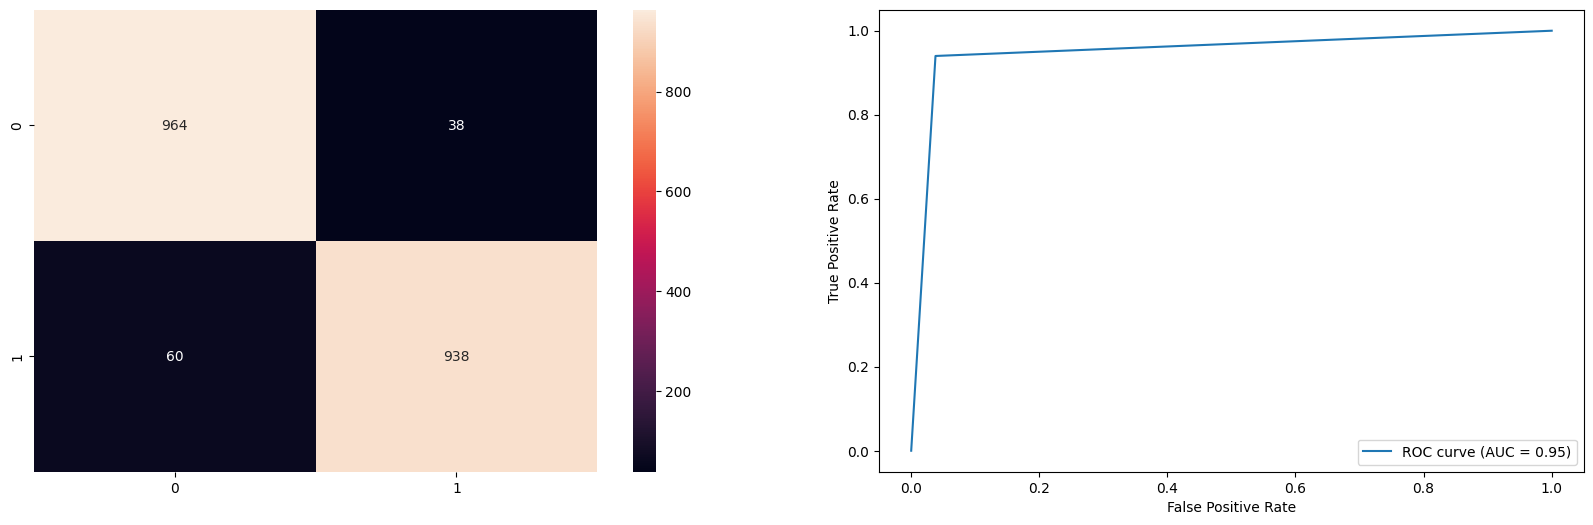

In [61]:
rf_model = RandomForestClassifier()
grid_params = {
    'n_estimators': [10, 100, 1000],
    'max_depth': [10,100],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_rf_search = GridSearchCV(estimator=rf_model, param_grid=grid_params, n_jobs=-1, cv=5,  scoring='accuracy')
grid_rf_search.fit(X_train, y_train)

# Prediction and Evaluation
y_test_predicted = grid_rf_search.predict(X_test)
print(metrics.classification_report(y_test, y_test_predicted))

# Confusion matrix
fig, ax = plt.subplots(1,2,figsize=(20,6))

cm = metrics.confusion_matrix(y_test, y_test_predicted)
sns.heatmap(cm, annot=True, fmt='d', ax=ax[0])


# ROC curve to the right
fpr, tpr, _ = metrics.roc_curve(y_test, y_test_predicted)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot(ax=ax[1])
plt.show()

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1002
           1       0.95      0.93      0.94       998

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



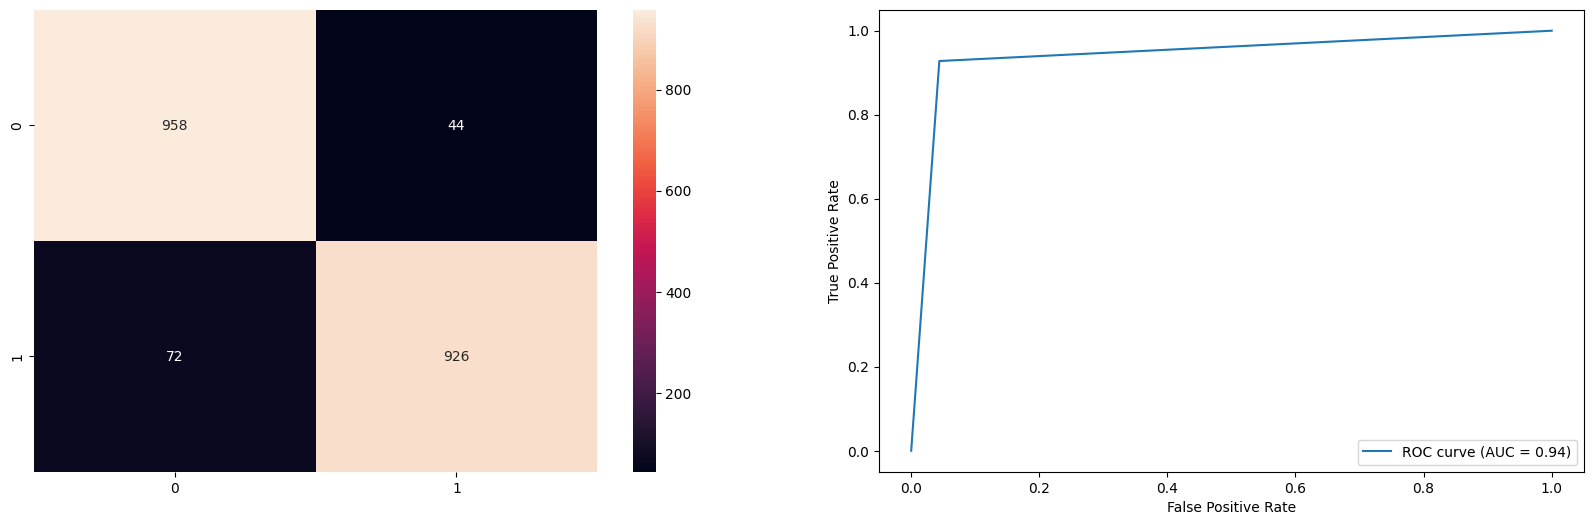

In [54]:
# SVC
svc_model = SVC()
grid_params = {
    'C': [100, 10, 1, 0.1, 0.01],
    'gamma': ['scale'],
    'kernel': ['rbf', 'poly']
}

grid_svc_search = GridSearchCV(estimator=svc_model, param_grid=grid_params, n_jobs=-1, cv=5,  scoring='accuracy')
grid_svc_search.fit(X_train, y_train)

# Prediction and Evaluation
y_test_predicted = grid_svc_search.predict(X_test)
print(metrics.classification_report(y_test, y_test_predicted))

# Confusion matrix
fig, ax = plt.subplots(1,2,figsize=(20,6))

cm = metrics.confusion_matrix(y_test, y_test_predicted)
sns.heatmap(cm, annot=True, fmt='d', ax=ax[0])


# ROC curve to the right
fpr, tpr, _ = metrics.roc_curve(y_test, y_test_predicted)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot(ax=ax[1])
plt.show()

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1002
           1       0.96      0.94      0.95       998

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



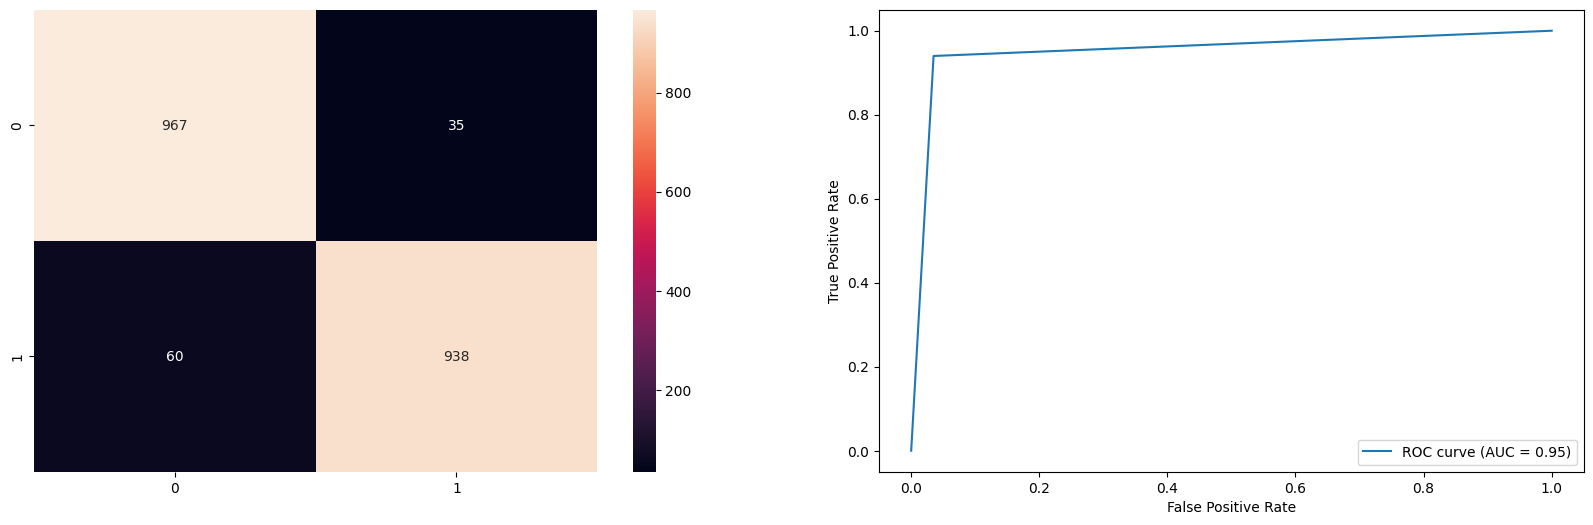

In [64]:
# Xboost Classsifier
xgb_model = XGBClassifier()
grid_params = {
    'n_estimators': [10, 100, 1000],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4]
}

grid_xgb_search = GridSearchCV(estimator=xgb_model, param_grid=grid_params, n_jobs=-1, cv=5,  scoring='accuracy')
grid_xgb_search.fit(X_train, y_train)

# Prediction and Evaluation
y_test_predicted = grid_xgb_search.predict(X_test)
print(metrics.classification_report(y_test, y_test_predicted))

# Confusion matrix
fig, ax = plt.subplots(1,2,figsize=(20,6))

cm = metrics.confusion_matrix(y_test, y_test_predicted)
sns.heatmap(cm, annot=True, fmt='d', ax=ax[0])


# ROC curve to the right
fpr, tpr, _ = metrics.roc_curve(y_test, y_test_predicted)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot(ax=ax[1])
plt.show()

[LightGBM] [Info] Number of positive: 4002, number of negative: 3998
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001652 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 592
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500250 -> initscore=0.001000
[LightGBM] [Info] Start training from score 0.001000
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1002
           1       0.97      0.93      0.95       998

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



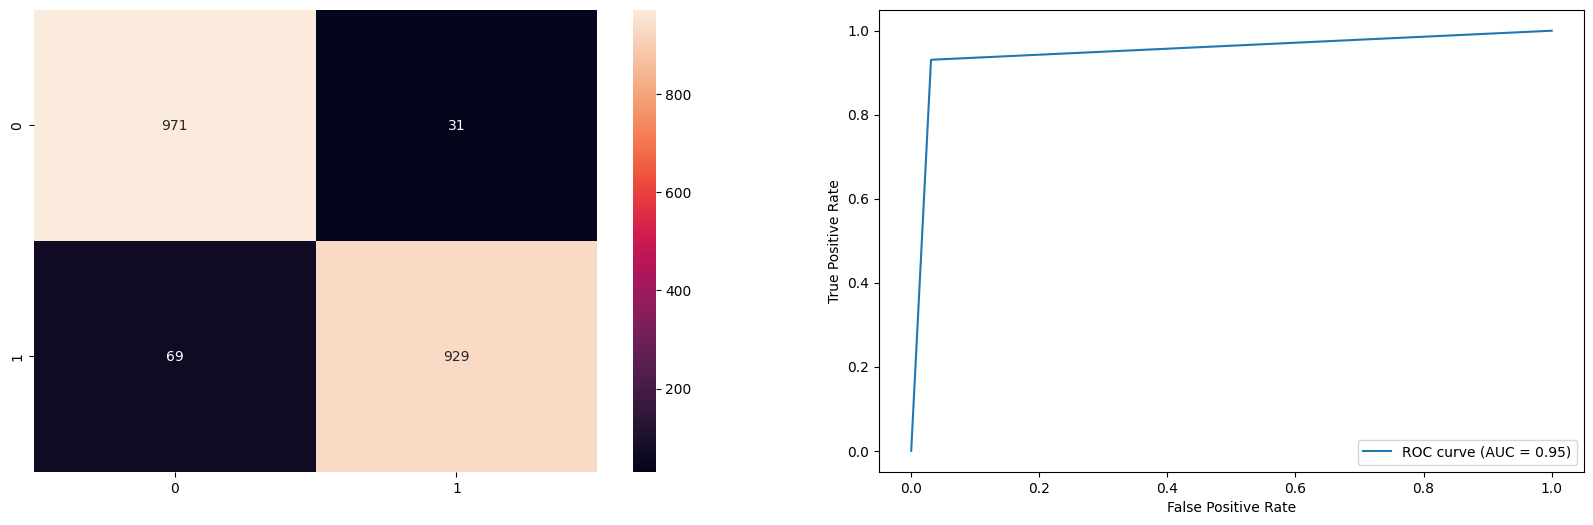

In [68]:
# LGBMClassifier
model = lgb.LGBMClassifier()  #lgb.LGBMClassifier()
grid_params = {
    'n_estimators': [10, 100, 1000],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4]
}

grid_lgb_search = GridSearchCV(estimator=model, param_grid=grid_params, n_jobs=-1, cv=5,  scoring='accuracy')
grid_lgb_search.fit(X_train, y_train)

# Prediction and Evaluation
y_test_predicted = grid_lgb_search.predict(X_test)
print(metrics.classification_report(y_test, y_test_predicted))

# Confusion matrix
fig, ax = plt.subplots(1,2,figsize=(20,6))

cm = metrics.confusion_matrix(y_test, y_test_predicted)
sns.heatmap(cm, annot=True, fmt='d', ax=ax[0])


# ROC curve to the right
fpr, tpr, _ = metrics.roc_curve(y_test, y_test_predicted)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot(ax=ax[1])
plt.show()

In [69]:
df_test = pd.read_csv("test_dataset.csv", index_col=0)
df_test_transformed = full_pipeline.fit_transform(df_test)


satisf_pred = grid_lgb_search.predict(df_test_transformed)

output = pd.DataFrame({'Id': df_test.index, 'satisfaction': satisf_pred})
output.to_csv('submission.csv', index=False)